# Gini models
Get coefficients of relationship between gini coefficients and win percentage

In [53]:
%matplotlib inline 

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

from src.data.process_team_indicators import index_vars, team_indicators, player_indicators
from src.data.utils import gini

In [8]:
df_p = pd.read_csv('../data/processed/player_indicators.csv')

df_g = pd.concat([pd.DataFrame(df_p.groupby(['team', 'year'])[i].apply(gini)) for i in player_indicators], axis=1)
## [df_g.rename(columns={i: i + '_gini'}, inplace=True) for i in player_indicators]
df_g.reset_index(inplace=True)

df_wins = pd.read_csv('../data/processed/team_indicators_EOY.csv')
df_g = pd.merge(df_g, df_wins)
df_g.head()

,team,year,Completions,Assists,Throwaways,Receptions,Goals,Drops,Ds,Turnovers,Plus_Minus,Wins,Losses,Win_pct
0,Atlanta Hustle,2015,0.464107,0.561047,0.614297,0.428622,0.581770,0.854967,0.590000,0.566205,0.568699,10,4,71.428571
1,Atlanta Hustle,2016,0.482527,0.623494,0.561078,0.456884,0.573670,0.860966,0.674895,0.521393,0.687292,8,8,50.000000
2,Atlanta Hustle,2017,0.512415,0.624244,0.642791,0.485584,0.615108,0.877430,0.633367,0.607149,0.633003,5,9,35.714286
3,Atlanta Hustle,2018,0.398099,0.580781,0.680439,0.376452,0.570041,0.861838,0.734381,0.629968,0.596819,7,7,50.000000
4,Austin Sol,2016,0.479488,0.624908,0.628895,0.456653,0.596024,0.826205,0.618547,0.577140,0.724214,7,7,50.000000


In [10]:
lm = LinearRegression()

In [36]:
indicator = 'Completions'
lm.fit(df_g[[indicator]], df_g['Win_pct'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
lm.coef_

array([-150.84047019])

In [38]:
# Returns the coefficient of determination R^2 of the prediction.
lm.score(df_g[[indicator]], df_g['Win_pct'])

0.0839546713546595

In [31]:
r2 = [lm.score(df_g[[i]], df_g['Win_pct']) for i in player_indicators]

In [32]:
r2

[-2.5417617899415017,
 0.29757330828387574,
 -0.545893565111379,
 -4.054522899545039,
 0.41956821026633284,
 -11.581639577138862,
 -0.3603426935154357,
 -0.9049863808240375,
 -56.276910935638746]

In [59]:
r2 = []
beta = []
for i in player_indicators:
    lm.fit(df_g[[i]], df_g['Win_pct'])
    beta.append(lm.coef_[0])
    r2.append(lm.score(df_g[[i]], df_g['Win_pct']))
gini_r2 = pd.DataFrame({'indicator':player_indicators, 'beta':beta, 'r2':r2})
gini_r2

,indicator,beta,r2
0,Completions,-150.840470,0.083955
1,Assists,-335.587231,0.334325
2,Throwaways,166.503195,0.056784
3,Receptions,-136.284444,0.075832
4,Goals,-375.539249,0.419568
5,Drops,292.314221,0.179566
6,Ds,-264.403280,0.128555
7,Turnovers,172.992649,0.057301
8,Plus_Minus,-37.997242,0.487087


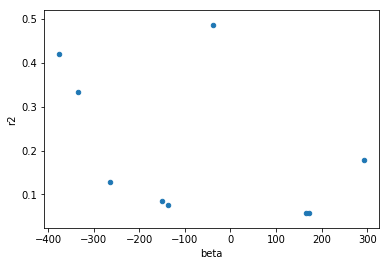

In [60]:
gini_r2.plot('beta', 'r2', 'scatter')

In [57]:
gini_r2.plot?